In [22]:
import pandas as pd
url=('https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv')
db=pd.read_csv(url)


In [ ]:
print(db.columns)

In [2]:
#elimino i country che non hanno uno stretto legame allo stato ma che fanno riferimento ad un insieme di stati
countrydaeliminare=['World', 'Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania','European Union (27)', 'Asia excl. China','High-income countries', 'Upper-middle-income countries','Lower-middle-income countries', 'Low-income countries','World excl. China', 'World excl. China and South Korea','World excl. China, South Korea, Japan and Singapore','Summer Olympics 2020', 'Winter Olympics 2022']
db=db[~db['country'].isin(countrydaeliminare)]    #ISIN #serve a verificare se i valori di una colonna sono presenti in una lista (o insieme) di valori.


In [ ]:
db.shape

In [3]:
#vado ad eliminare i valori nulli presenti in continent con hoe imposto almeno se e presente un nan e subset vado a settare la colonnna
db=db.dropna(subset='country',how= "any")
db

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547055,Zimbabwe,2025-11-12,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547056,Zimbabwe,2025-11-13,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547057,Zimbabwe,2025-11-14,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547058,Zimbabwe,2025-11-15,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN


In [4]:
db.shape

(511890, 61)

In [5]:
casi_stati=db.groupby('country')['new_cases'].sum().round()

In [6]:
casi_stati=db.groupby('country')['new_cases'].sum().round()#sommo i nuovi casi per ogni continente
totalemondiale=db['new_cases'].sum()

percentualemondiale=(casi_stati/totalemondiale*100).round(2) #divido i casi per quelli mondiali e faccio la percentuale
percentualemondiale.round(2) #con round arrotondo a due decimali

tot_perc=pd.DataFrame({ 
    'tot_casi':casi_stati,
    'percentuale_mondiale':percentualemondiale})

print(tot_perc)

                   tot_casi  percentuale_mondiale
country                                          
Afghanistan        235214.0                  0.03
Albania            337215.0                  0.04
Algeria            272421.0                  0.03
American Samoa       8359.0                  0.00
Andorra             48015.0                  0.01
...                     ...                   ...
Wallis and Futuna    3760.0                  0.00
Western Sahara          0.0                  0.00
Yemen               11945.0                  0.00
Zambia             349892.0                  0.04
Zimbabwe           266437.0                  0.03

[244 rows x 2 columns]


In [24]:
db['date'].info() #verifico la colonna data di che tipo è la cambio in formato data_time

<class 'pandas.core.series.Series'>
RangeIndex: 547060 entries, 0 to 547059
Series name: date
Non-Null Count   Dtype         
--------------   -----         
547060 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.2 MB


In [23]:
#trasformo la colonna date in datatime ed estraggo l'anno 2022
db["date"] = pd.to_datetime(db["date"])

In [25]:
db['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 547060 entries, 0 to 547059
Series name: date
Non-Null Count   Dtype         
--------------   -----         
547060 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.2 MB


<Axes: xlabel='date'>

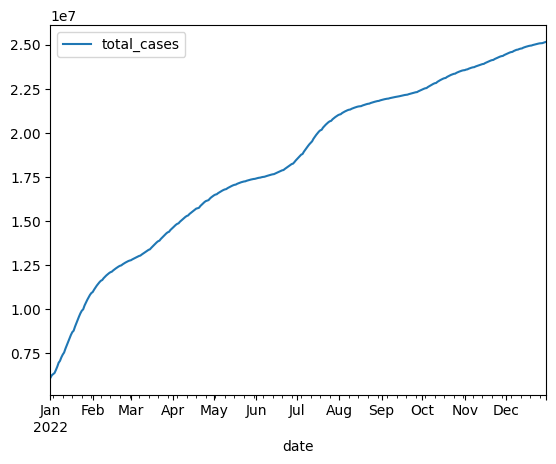

In [26]:
filtroitalia=db['country']=='Italy'# filtro per italia
filtroanno=db['date'].dt.year==2022 #estraggo l'anno
giornoseenzamisurazioni=db['new_cases'].notna() # filtriamo la colonna total_case e con notna prendiamo i dati non presenti
filtro_generale=db[(filtroitalia)&(filtroanno)&(giornoseenzamisurazioni)]
filtro_generale.plot(x='date',y='total_cases')


<Axes: xlabel='date'>

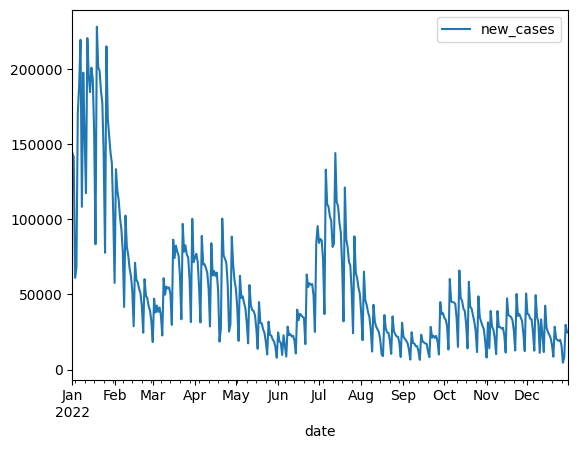

In [27]:
#il numero di nuovi casi rispetto alla data
filtroitalia=db['country']=='Italy'# filtro per italia
filtroanno=db['date'].dt.year==2022 #estraggo l'anno
giornoseenzamisurazioni=db['new_cases'].notna() # filtriamo la colonna total_case e con notna prendiamo i dati non presenti
filtro_generale=db[(filtroitalia)&(filtroanno)&(giornoseenzamisurazioni)]
filtro_generale.plot(x='date',y='new_cases')

<Axes: xlabel='country', ylabel='icu_patients'>

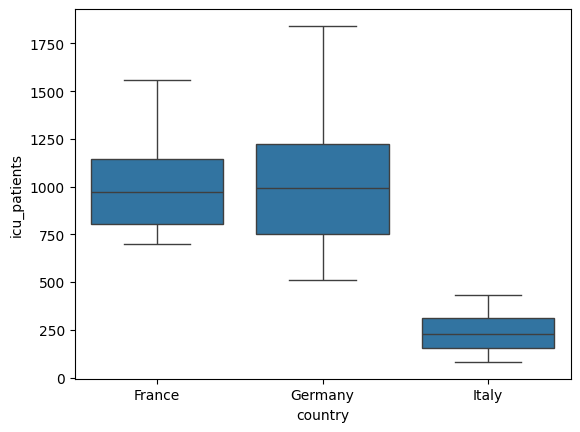

In [28]:
import seaborn as sb
nazioni=db['country'].isin(['Italy','France','Germany'])
datainizio='2022-05-01'
datafine='2023-04-30'
datefiltrate=(db['date']>=datainizio)&(db['date']<=datafine)
filtro_finale=db[nazioni&datefiltrate]
sb.boxplot(data=filtro_finale,x='country',y='icu_patients')
#nel grafico notiamo che lo stato con minor terapie intensive e l'italia


In [ ]:
db['country'].unique()


In [ ]:
#verifico i dati nulli presenti che sono 365
ultimofiltro=db['country'].isin(['Italy','Germany','France','Spain'])
filtro2021=db['date'].dt.year==2021
filtroconclusico5=db[ultimofiltro&filtro2021]
filtroconclusico5['hosp_patients'].isna().sum()








np.int64(365)

<Axes: ylabel='country'>

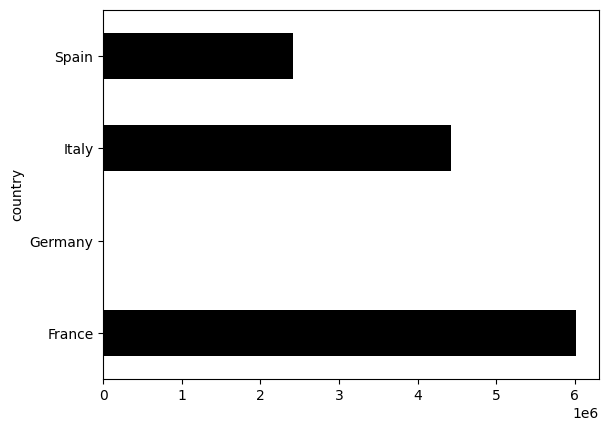

In [58]:
grafico5=filtroconclusico5.groupby('country')['hosp_patients'].sum()
grafico5.plot(kind='barh',color='black')